# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#800080', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

# Importing Dataset

In [2]:
data = pd.read_csv("D:/Stack Prediction/train (2).csv")
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


# DataFrame Properties 

In [3]:
data.shape

(330045, 7)

In [4]:
data.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [5]:
data["Tag"].unique()

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [6]:
data.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [7]:
data.drop(["ID"],axis=1, inplace=True)

In [8]:
data.head()

,Tag,Reputation,Answers,Username,Views,Upvotes
0,a,3942.0,2.0,155623,7855.0,42.0
1,a,26046.0,12.0,21781,55801.0,1175.0
2,c,1358.0,4.0,56177,8067.0,60.0
3,a,264.0,3.0,168793,27064.0,9.0
4,c,4271.0,4.0,112223,13986.0,83.0


In [9]:
data.drop(["Username"],axis = 1, inplace=True)
data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [10]:
data.dtypes

Tag            object
Reputation    float64
Answers       float64
Views         float64
Upvotes       float64
dtype: object

# Encoding 

In [11]:
sc=StandardScaler()
oe=OrdinalEncoder()

In [12]:
num_data=data.select_dtypes(include=np.float)
cat_data=data.select_dtypes(include=np.object)

In [13]:
cat_df=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)
cat_df["Tag"].unique()

array([0., 1., 7., 4., 6., 8., 2., 5., 3., 9.])

In [14]:
num_df=pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)
num_df.head()

,Reputation,Answers,Views,Upvotes
0,-0.141573,-0.535736,-0.269158,-0.082258
1,0.675238,2.257943,0.323087,0.233127
2,-0.237059,0.023000,-0.266540,-0.077247
3,-0.277486,-0.256368,-0.031882,-0.091444
4,-0.129415,0.023000,-0.193426,-0.070845


In [15]:
data.drop(["Tag"],axis=1,inplace=True)

In [16]:
final = pd.concat([num_df,cat_df],axis=1)
final.head()

,Reputation,Answers,Views,Upvotes,Tag
0,-0.141573,-0.535736,-0.269158,-0.082258,0.0
1,0.675238,2.257943,0.323087,0.233127,0.0
2,-0.237059,0.023000,-0.266540,-0.077247,1.0
3,-0.277486,-0.256368,-0.031882,-0.091444,0.0
4,-0.129415,0.023000,-0.193426,-0.070845,1.0


# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B46333C8>,
      dtype=object)

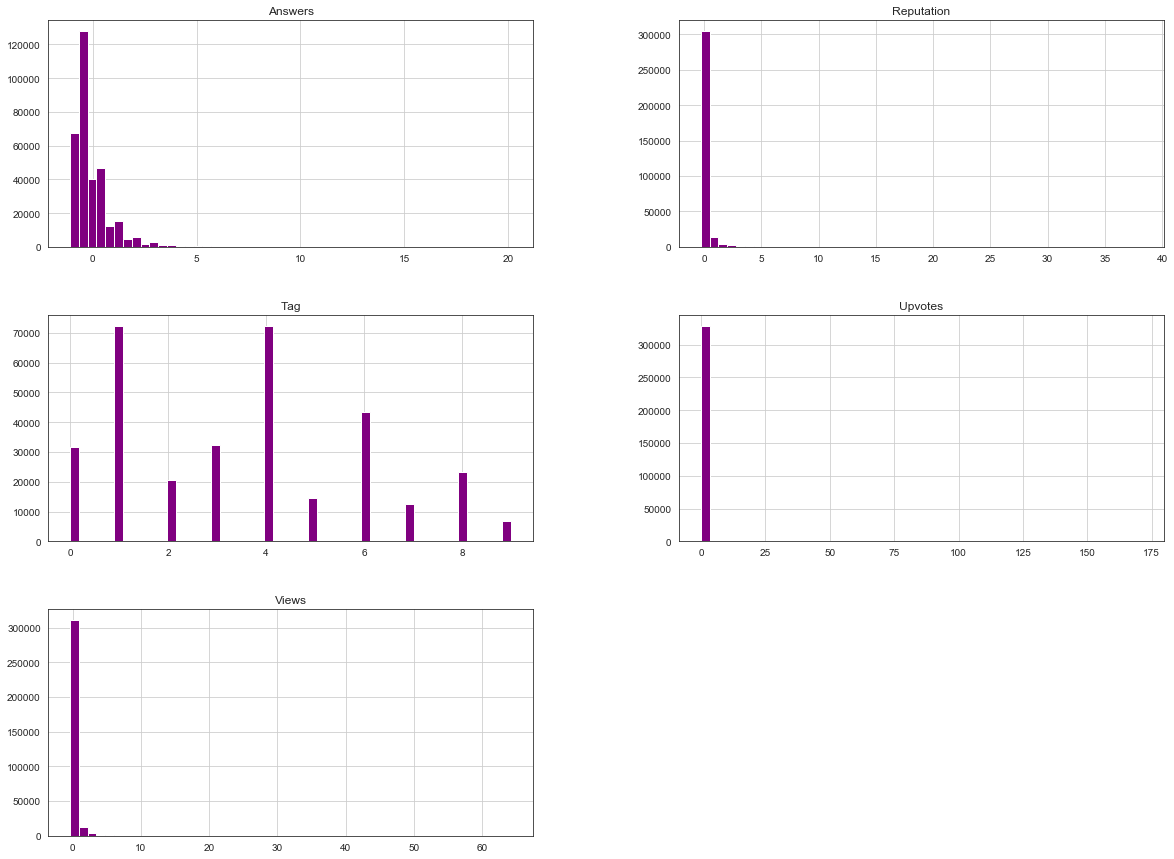

In [36]:
final.hist(bins=50,figsize=(20,15))

# Correlation

In [18]:
final.corr()

,Reputation,Answers,Views,Upvotes,Tag
Reputation,1.000000,0.066504,0.036455,0.266710,-0.024017
Answers,0.066504,1.000000,0.498642,0.202033,-0.064710
Views,0.036455,0.498642,1.000000,0.437336,-0.011807
Upvotes,0.266710,0.202033,0.437336,1.000000,-0.004300
Tag,-0.024017,-0.064710,-0.011807,-0.004300,1.000000


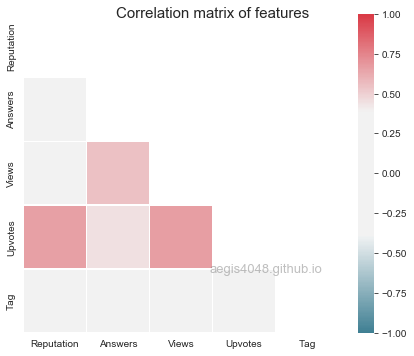

In [35]:
corr = final.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

# Linear Regression

In [20]:
features = ['Views','Reputation','Answers','Tag']
target = 'Upvotes'
y=final['Upvotes']
x=final[['Views','Reputation','Answers','Tag']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [22]:

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(reg.coef_)
print(reg.intercept_)
ypred=reg.predict(x_test)

[ 0.42516366  0.26160939 -0.02970415  0.0019925 ]
-0.007073949981109924


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))
r2 = r2_score(y_test, ypred)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 0.16375942636193053
Mean Squared Error: 0.924560659970388
Root Mean Squared Error: 0.961540773951052
r2 score for perfect model is 0.24727451566181213


# Decision Tree

In [26]:
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,Ypred)))
scor = r2_score(y_test, Ypred)
print('r2 score for perfect model is', scor)

Mean Absolute Error: 0.040831993323815964
Mean Squared Error: 0.1839225157002098
Root Mean Squared Error: 0.4288618841774235
r2 score for perfect model is 0.8502605932686208


# Random Forest

In [28]:
rf=RandomForestRegressor(n_estimators = 100,random_state=0)
rf.fit(x_train,y_train)
yp=rf.predict(x_test)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yp))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yp)))
r_scor = r2_score(y_test, yp)
print('r2 score for perfect model is', r_scor)

Mean Absolute Error: 0.03165487964093246
Mean Squared Error: 0.21840291952151106
Root Mean Squared Error: 0.4673359814111375
r2 score for perfect model is 0.8221885804843038


# KNN

In [31]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [32]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [33]:
ypd = knn_model.predict(x_test)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypd))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,ypd)))
r_scor = r2_score(y_test, ypd)
print('r2 score for perfect model is', r_scor)

Mean Absolute Error: 0.0436458278590944
Mean Squared Error: 0.4113344962225406
Root Mean Squared Error: 0.6413536436495396
r2 score for perfect model is 0.6651145010820243


In [37]:
accuracy_score = {'Models':["Linear Regression","Decision Tree","Random Forest","KNN"],'Accuracy':[0.2472745156618119,0.8512001511302559,0.8259497299755344,0.7430263260232207]}

In [38]:
acc_Data = pd.DataFrame(accuracy_score)
acc_Data

,Models,Accuracy
0,Linear Regression,0.247275
1,Decision Tree,0.851200
2,Random Forest,0.825950
3,KNN,0.743026


# Accuracy Visualization

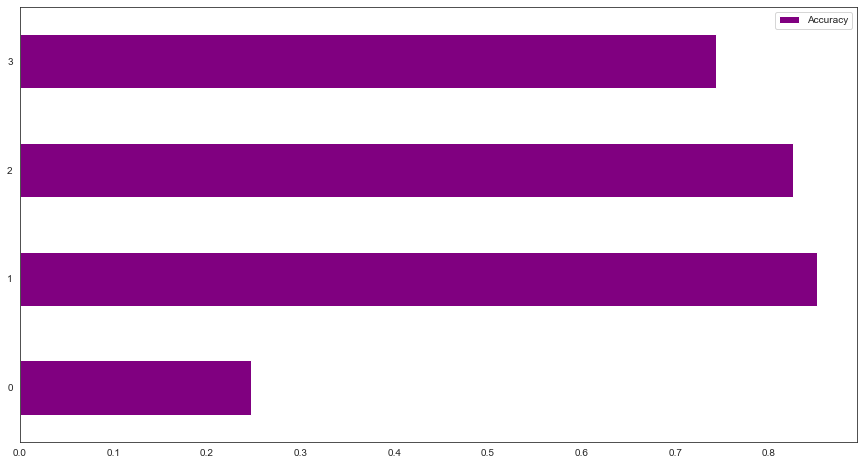

In [39]:
acc_Data.plot(kind='barh', figsize=(15, 8))